<a href="https://colab.research.google.com/github/LeonardoRobert/projeto-bd-colab/blob/main/Projeto_BD_SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,ID Venda,Cliente,Produto,Quantidade
0,1,Maria,Caneta,10
1,2,João,Caderno,2


Relatório: Total de vendas por produto


,Produto,Total Vendas
0,Caderno,2
1,Caneta,10


Média de idade das pessoas cadastradas: 31.67 anos


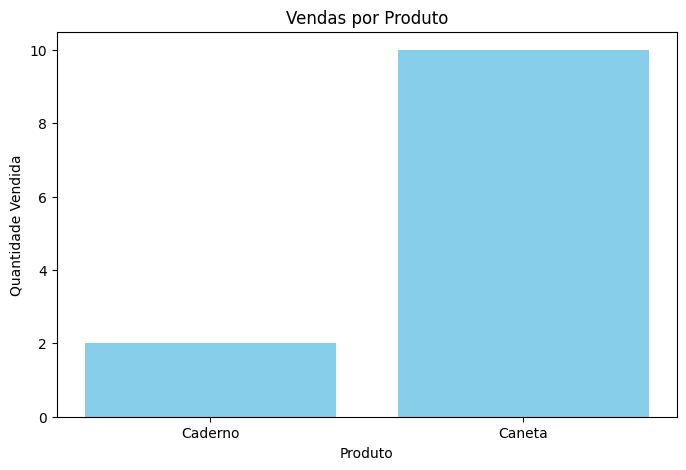

In [6]:
import sqlite3
# PROJETO-BD-SQLITE.ipynb
# ---------------------------------------------------------
# Seção 1: Importar bibliotecas e conectar ao BD
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect(':memory:')  # ou 'projeto.db' para salvar em arquivo
cursor = conn.cursor()
cursor.execute("PRAGMA foreign_keys = ON;")  # Ativar chaves estrangeiras

# ---------------------------------------------------------
# Seção 2: Criação de tabelas
try:
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS pessoas (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        nome TEXT NOT NULL,
        idade INTEGER
    );
    ''')
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS produtos (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        descricao TEXT NOT NULL,
        estoque INTEGER,
        preco REAL
    );
    ''')
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS vendas (
        id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
        id_pessoa INTEGER,
        id_produto INTEGER,
        quantidade INTEGER,
        FOREIGN KEY (id_pessoa) REFERENCES pessoas(id),
        FOREIGN KEY (id_produto) REFERENCES produtos(id)
    );
    ''')
    conn.commit()
except sqlite3.Error as e:
    print(f"Erro na criação das tabelas: {e}")

# ---------------------------------------------------------
# Seção 3: Inserção de dados
try:
    # ATENÇÃO: Apague as linhas abaixo após a primeira execução para evitar duplicações
    cursor.execute("INSERT INTO pessoas (nome, idade) VALUES ('Maria', 30);")
    cursor.execute("INSERT INTO pessoas (nome, idade) VALUES ('João', 25);")
    cursor.execute("INSERT INTO pessoas (nome, idade) VALUES ('Ana', 40);")

    cursor.execute("INSERT INTO produtos (descricao, estoque, preco) VALUES ('Caneta', 100, 1.50);")
    cursor.execute("INSERT INTO produtos (descricao, estoque, preco) VALUES ('Caderno', 50, 6.50);")

    cursor.execute("INSERT INTO vendas (id_pessoa, id_produto, quantidade) VALUES (1, 1, 10);")  # Maria comprou 10 canetas
    cursor.execute("INSERT INTO vendas (id_pessoa, id_produto, quantidade) VALUES (2, 2, 2);")   # João comprou 2 cadernos

    conn.commit()
except sqlite3.IntegrityError as e:
    print(f"Dados já inseridos: {e}")
except sqlite3.Error as e:
    print(f"Erro ao inserir dados: {e}")

# ---------------------------------------------------------
# Seção 4: Consultas e exibição usando pandas
try:
    cursor.execute('''
    SELECT v.id_venda, p.nome, pr.descricao, v.quantidade
    FROM vendas v
    JOIN pessoas p ON v.id_pessoa = p.id
    JOIN produtos pr ON v.id_produto = pr.id;
    ''')
    resultados = cursor.fetchall()
    df = pd.DataFrame(resultados, columns=['ID Venda', 'Cliente', 'Produto', 'Quantidade'])
    display(df)
except sqlite3.Error as e:
    print(f"Erro na consulta: {e}")

# ---------------------------------------------------------
# Seção 5: Relatórios simples

# Somatório de vendas por produto
try:
    cursor.execute('''
    SELECT pr.descricao, SUM(v.quantidade) as total_vendas
    FROM vendas v
    JOIN produtos pr ON v.id_produto = pr.id
    GROUP BY pr.descricao;
    ''')
    resultados_vendas = cursor.fetchall()
    df_vendas = pd.DataFrame(resultados_vendas, columns=['Produto', 'Total Vendas'])
    print("Relatório: Total de vendas por produto")
    display(df_vendas)
except sqlite3.Error as e:
    print(f"Erro no relatório de vendas: {e}")

# Média de idade das pessoas cadastradas
try:
    cursor.execute('SELECT AVG(idade) FROM pessoas;')
    media_idade = cursor.fetchone()[0]
    print(f"Média de idade das pessoas cadastradas: {media_idade:.2f} anos")
except sqlite3.Error as e:
    print(f"Erro ao calcular média de idade: {e}")

# ---------------------------------------------------------
# Seção 6: Gráfico com matplotlib
try:
    produtos = df_vendas['Produto']
    vendas = df_vendas['Total Vendas']

    plt.figure(figsize=(8,5))
    plt.bar(produtos, vendas, color='skyblue')
    plt.title('Vendas por Produto')
    plt.xlabel('Produto')
    plt.ylabel('Quantidade Vendida')
    plt.show()
except Exception as e:
    print(f"Erro ao gerar gráfico: {e}")

# ---------------------------------------------------------
# Seção 7: Encerramento
# conn.close()  # Só feche se terminar o notebook aqui
